# 第三十一讲 线性变换及对应矩阵

线性变换满足两个性质：
* $T(v + w) = T(v) + T(w)$
* $T(cv) = cT(v)$

这两个性质可以写成一条公式 $T(cv + dw) = cT(v) + dT(w)$。

* 例一，投影，将一个向量投影到一个空间上。
* 例二，平移，这个操作并不是一个线性变换。

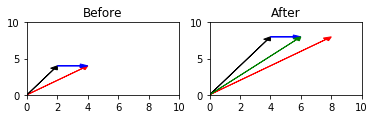

In [56]:
%matplotlib inline
from functools import partial
import matplotlib.pyplot as plt
import numpy as np


fig1 = plt.subplot(223)
fig1.arrow(0, 0, 4, 4, head_width=0.5, head_length=0.5, color='red', length_includes_head=True)
fig1.arrow(0, 0, 2, 4, head_width=0.5, head_length=0.5, color='black', length_includes_head=True)
fig1.arrow(2, 4, 2, 0, head_width=0.5, head_length=0.5, color='blue', length_includes_head=True)
plt.title('Before')
fig1.set_xlim(0, 10)
fig1.set_ylim(0, 10)

fig2 = plt.subplot(224)
fig2.arrow(0, 0, 8, 8, head_width=0.5, head_length=0.5, color='red', length_includes_head=True)
fig2.arrow(0, 0, 4, 8, head_width=0.5, head_length=0.5, color='black', length_includes_head=True)
fig2.arrow(4, 8, 2, 0, head_width=0.5, head_length=0.5, color='blue', length_includes_head=True)
fig2.arrow(0, 0, 6, 8, head_width=0.5, head_length=0.5, color='green', length_includes_head=True)
plt.title('After')
fig2.set_xlim(0, 10)
fig2.set_ylim(0, 10)

plt.subplots_adjust(hspace=1)
plt.show()

比如在二维空间的一个平移操作，向右平移两个单位。假设 $v = (2, 4)$，平移后得到的 $T(v) = (4, 4)$，而 $2v = (4, 8)$， 平移后得到 $T(2v) = (6, 8) ≠ (8, 8) = 2T(v)$。

* 例三，取模操作，该操作同样不是一个线性变换。如果将一个向量翻倍取模，那么得到的模也会翻倍，但是如果将向量取负，模却不变。
* 例四，旋转45度，将平面内一个向量映射为平面内另一个向量。
* 例五，矩阵乘以向量，$T(v) = Av$，不同的矩阵代表不同的线性变换。根据矩阵的运算法则有 $A(v + w) = Av + Aw, Acv = cAv$。

线性变换的核心，就是该变换使用的相应的矩阵。

比如现在有一个线性变换，是将一个三维向量降为二维向量，$T: \mathbb{R}^3 \rightarrow \mathbb{R}^2$，则变换对应的矩阵乘法 $T(v) = Av$ 中，$T(v) \in \mathbb{R}^2$ 为输入值，$v \in \mathbb{R}^3$ 为输入值，矩阵 $A$ 为一个 $2 * 3$ 的矩阵。

如果我们希望知道线性变换 $T$ 对整个输入空间 $\mathbb{R}^n$ 的影响，我们可以找到空间的一组基 $v_1, v_2, \dots, v_n$，检查 $T$ 对每一个基的影响 $T(v_1), T(v_2), ⋯, T(v_n)$，由于输入空间中的任意向量都满足：$v = c_1v_1 + c_2v_2 + \dots + c_nv_n$，所以我们可以根据 $T(v)$ 推出线性变换 $T$ 对空间内任意向量的影响，得到 $T(v) = c_1T(v_1) + c_2T(v_2) + \dots + c_nT(v_n)$。

例如 $v = \begin{bmatrix}4 \\ 3 \\ 2\end{bmatrix} = 4\begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix} + 3\begin{bmatrix}0 \\ 1 \\ 0\end{bmatrix} + 2\begin{bmatrix}0 \\ 0 \\ 1\end{bmatrix}$，这里将向量 $v$ 分解成一组由基向量。

最后我们介绍一种不一样的线性变换，求导，$T = \frac{d}{dx}$。现在有输入 $c_1 + c_2x + c_3x^2$，基为 $1, x, x^2$，而输出为 $c_2 + 2c_3$，基为 $1, x$。而求导过程可以表示为线性变换：

$$\begin{bmatrix}0 & 1 & 0 \\ 0 & 0 & 2\end{bmatrix}\begin{bmatrix}c_1 \\ c_2 \\ c_3\end{bmatrix} = \begin{bmatrix}c_2 \\ 2c_3\end{bmatrix}$$